# Titanic - Machine Learning from Disaster

Question: What sorts of people were more likely to survive? (using passenger data: name, age gender, socio-economic class, etc.)

Goal: Predict if a passenger survived the sinking of the Titanic or not. For each person in the test set, you must predict a 0 or a 1 value for the variable.

Metric: Your score is the percentage of passengers you correctly predict. This is known as accuracy.

### Steps
1. View and Clean Data
2. Set up Sck-kit models
3. Set up Feed Forward NN in Pytorch model.
4. Train/Test Models
5. Compare Performance of Models.
6. Take best model and run it on test set


In [48]:
from data_pipeline import (
    clean_titanic_data,
    prepare_titanic_data,
    read_titanic_data,
)
from train_pipeline import Model

In [49]:
# Extract, prepare, and split data

path = "titanic/"
train_df = read_titanic_data(path, "train.csv")
test_df = read_titanic_data(path, "test.csv")

train_clean_df, encoded_labels = clean_titanic_data(train_df)
new_train_df, train_test_split = prepare_titanic_data(train_clean_df, 0.2, 42)

X_train, X_test, y_train, y_test = train_test_split

In [50]:
new_train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.522376,1,0,-0.521028,2
1,1,1,0,0.579179,1,0,0.685138,0
2,1,3,0,-0.246988,0,0,-0.508313,2
3,1,1,0,0.372637,1,0,0.342628,2
4,0,3,1,0.372637,0,0,-0.505958,2
...,...,...,...,...,...,...,...,...
885,0,3,0,0.648026,0,5,-0.108978,1
886,0,2,1,-0.178140,0,0,-0.412718,2
887,1,1,0,-0.728918,0,0,-0.092496,2
889,1,1,1,-0.246988,0,0,-0.092496,0


## Logistic Regression

Model: LogisticRegression()

Model Accuracy: 83.688%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        85
           1       0.84      0.73      0.78        56

    accuracy                           0.84       141
   macro avg       0.84      0.82      0.83       141
weighted avg       0.84      0.84      0.83       141



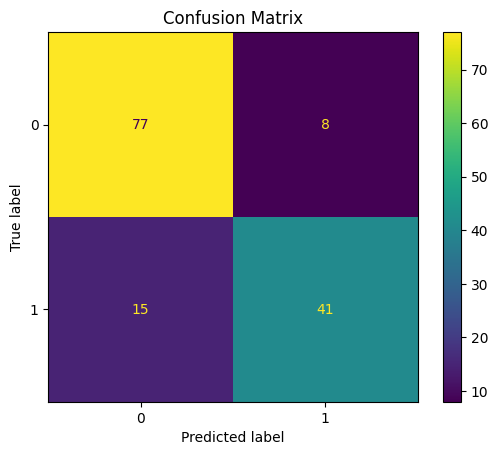

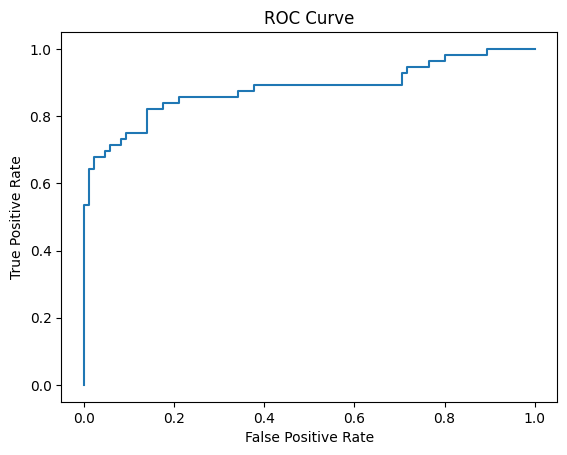

In [51]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = Model(LogisticRegression())
model, y_pred = log_reg.train(X_train, y_train, X_test)
(
    lr_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = log_reg.evaluate_model(X_test, y_test, y_pred)

log_reg.display_metrics(lr_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies = {}
model_accuracies["Logistic Regress"] = lr_accuracy

In [52]:
log_reg.save_model("trained_models/logistic_regression.pkl")

Saved model 'LogisticRegression' as trained_models/logistic_regression.pkl


## Decision Tree

Model: DecisionTreeClassifier()

Model Accuracy: 76.596%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        85
           1       0.76      0.61      0.67        56

    accuracy                           0.77       141
   macro avg       0.76      0.74      0.75       141
weighted avg       0.76      0.77      0.76       141



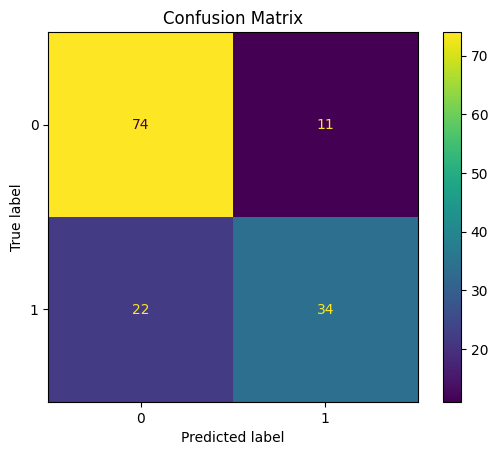

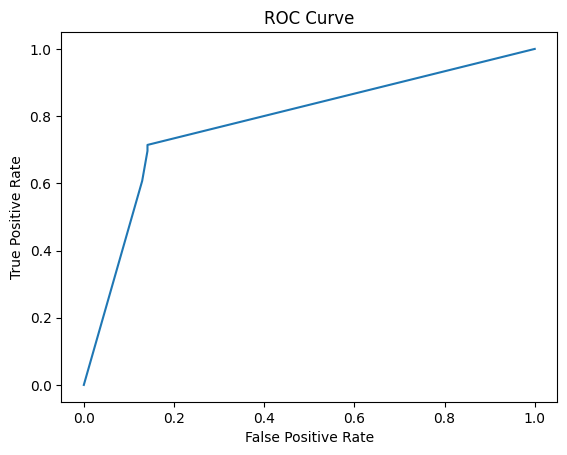

In [53]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = Model(DecisionTreeClassifier())
model, y_pred = decision_tree.train(X_train, y_train, X_test)
(
    dt_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = decision_tree.evaluate_model(X_test, y_test, y_pred)

decision_tree.display_metrics(dt_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies["Decision Tree"] = dt_accuracy

In [54]:
decision_tree.save_model("trained_models/decision_tree.pkl")

Saved model 'DecisionTreeClassifier' as trained_models/decision_tree.pkl


## Random Forest

Model: RandomForestClassifier()

Model Accuracy: 83.688%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        85
           1       0.87      0.70      0.77        56

    accuracy                           0.84       141
   macro avg       0.84      0.81      0.82       141
weighted avg       0.84      0.84      0.83       141



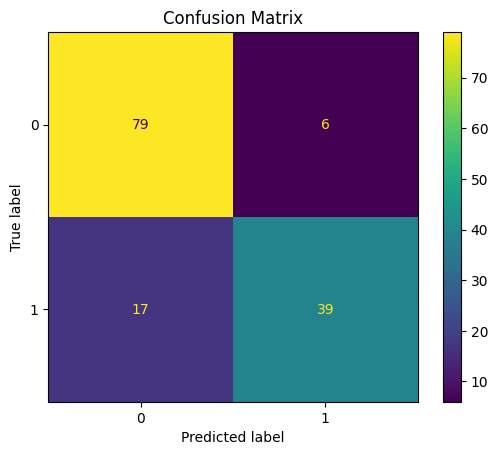

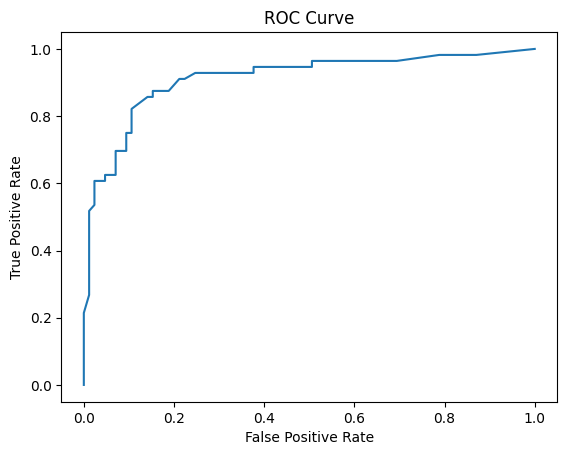

In [55]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = Model(RandomForestClassifier())

model, y_pred = random_forest.train(X_train, y_train, X_test)
(
    rf_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = random_forest.evaluate_model(X_test, y_test, y_pred)

random_forest.display_metrics(rf_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies["Random Forest"] = rf_accuracy

In [56]:
random_forest.save_model("trained_models/random_forest.pkl")

Saved model 'RandomForestClassifier' as trained_models/random_forest.pkl


## Support Vector Machine

Model: SVC(probability=True)

Model Accuracy: 87.943%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        85
           1       0.87      0.82      0.84        56

    accuracy                           0.88       141
   macro avg       0.88      0.87      0.87       141
weighted avg       0.88      0.88      0.88       141



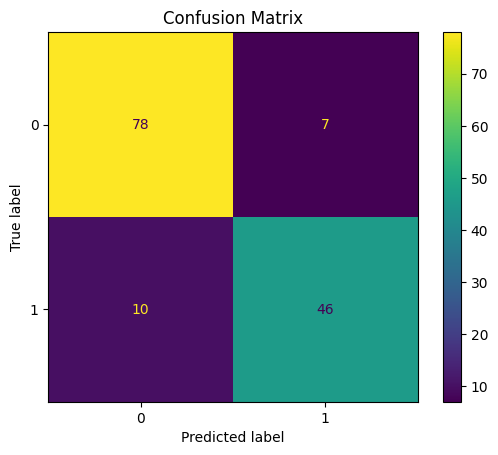

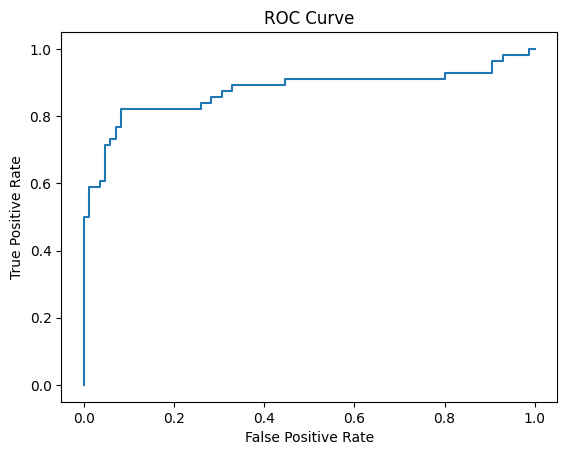

In [57]:
# Support Vector Machine

from sklearn.svm import SVC

svm = Model(SVC(probability=True))

model, y_pred = svm.train(X_train, y_train, X_test)
(
    svm_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = svm.evaluate_model(X_test, y_test, y_pred)

svm.display_metrics(svm_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies["SVM"] = svm_accuracy

In [58]:
svm.save_model("trained_models/support_vector_machine.pkl")

Saved model 'SVC(probability=True)' as trained_models/support_vector_machine.pkl


## Gradient Boosting

Model: GradientBoostingClassifier()

Model Accuracy: 85.816%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        85
           1       0.93      0.70      0.80        56

    accuracy                           0.86       141
   macro avg       0.88      0.83      0.84       141
weighted avg       0.87      0.86      0.85       141



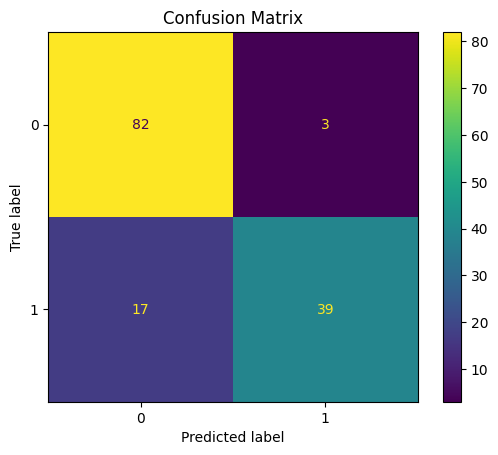

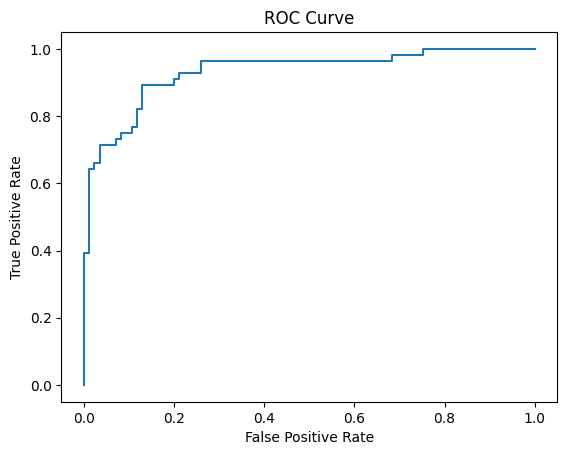

In [59]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = Model(GradientBoostingClassifier())

model, y_pred = gradient_boosting.train(X_train, y_train, X_test)
(
    gb_accuracy,
    conf_matrix,
    class_report,
    fpr,
    tpr,
) = gradient_boosting.evaluate_model(X_test, y_test, y_pred)

gradient_boosting.display_metrics(gb_accuracy, conf_matrix, class_report, fpr, tpr)

model_accuracies["Gradient Boosting"] = gb_accuracy

In [60]:
gradient_boosting.save_model("trained_models/gradient_boosting.pkl")

Saved model 'GradientBoostingClassifier' as trained_models/gradient_boosting.pkl


## Pytorch Model

In [61]:
from torch.utils.data import DataLoader

from train_neural_net import (
    CustomDataset,
    convert_df_to_tensor,
)

X_train_tensor = convert_df_to_tensor(X_train)
y_train_tensor = convert_df_to_tensor(y_train)

y_train_tensor = y_train_tensor.reshape(len(y_train_tensor), 1)

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_test_tensor = convert_df_to_tensor(X_test)
y_test_tensor = convert_df_to_tensor(y_test)

y_test_tensor = y_test_tensor.reshape(len(y_test_tensor), 1)

test_dataset = CustomDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [62]:
from train_neural_net import save_model, train_pytorch_model

best_values, loss_lists, eval_outputs = train_pytorch_model(
    train_dataloader, test_dataloader, num_epochs=100
)

pytorch_model, best_epoch, best_avg_loss = best_values
train_list, val_list = loss_lists
targets, predictions, probabilities = eval_outputs

print(f"Best Model loss: {best_avg_loss}")

Epoch 1
Train Loss: 0.6528092291620042
Val Loss: 0.5945457220077515

Epoch 2
Train Loss: 0.568752290474044
Val Loss: 0.5049712657928467

Epoch 3
Train Loss: 0.504380390048027
Val Loss: 0.4560561776161194

Epoch 4
Train Loss: 0.4574014362361696
Val Loss: 0.40827131271362305

Epoch 5
Train Loss: 0.44570620689127183
Val Loss: 0.3649882674217224

Epoch 6
Train Loss: 0.42207108934720355
Val Loss: 0.42953309416770935

Epoch 7
Train Loss: 0.4263627611928516
Val Loss: 0.3820769190788269

Epoch 8
Train Loss: 0.42375467386510635
Val Loss: 0.4034830927848816

Epoch 9
Train Loss: 0.4004642499817742
Val Loss: 0.358498752117157

Epoch 10
Train Loss: 0.3989287291963895
Val Loss: 0.3990107476711273

Epoch 11
Train Loss: 0.40514088173707324
Val Loss: 0.3926697075366974

Epoch 12
Train Loss: 0.4036199351151784
Val Loss: 0.36089807748794556

Epoch 13
Train Loss: 0.4002617307835155
Val Loss: 0.34721237421035767

Epoch 14
Train Loss: 0.389742836356163
Val Loss: 0.33547306060791016

Epoch 15
Train Loss: 0.3

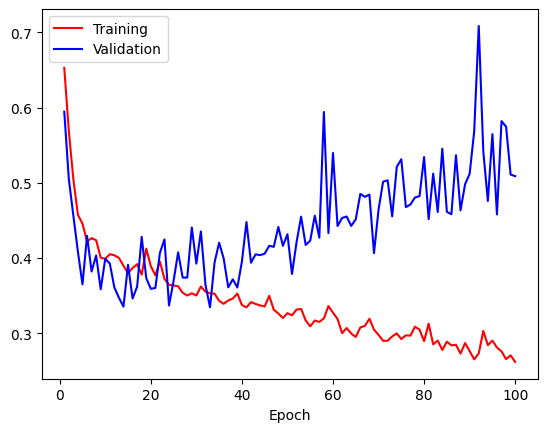

In [63]:
import matplotlib.pyplot as plt

epochs = [*range(1, 101)]

plt.plot(epochs, train_list, label="Training", color="red")
plt.plot(epochs, val_list, label="Validation", color="blue")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [64]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_model(pytorch_model, best_epoch, timestamp)

In [71]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

targets_df = pd.DataFrame(targets)
predictions_df = pd.DataFrame(predictions)

dl_accuracy = accuracy_score(targets_df, predictions_df)
precision = precision_score(targets_df, predictions_df)
recall = recall_score(targets_df, predictions_df)
f1 = f1_score(targets_df, predictions_df)

cnf_matrix = confusion_matrix(targets_df, predictions_df)

class_report = classification_report(targets_df, predictions_df)

model_accuracies["Deep Learning"] = dl_accuracy

In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(targets, probabilities)

Accuracy: 0.87943

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91        85
         1.0       0.91      0.77      0.83        56

    accuracy                           0.88       141
   macro avg       0.89      0.86      0.87       141
weighted avg       0.88      0.88      0.88       141



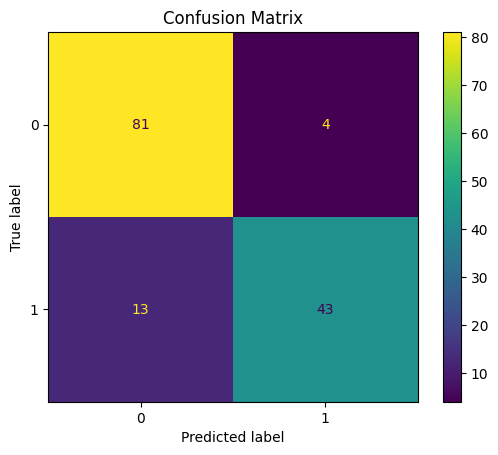

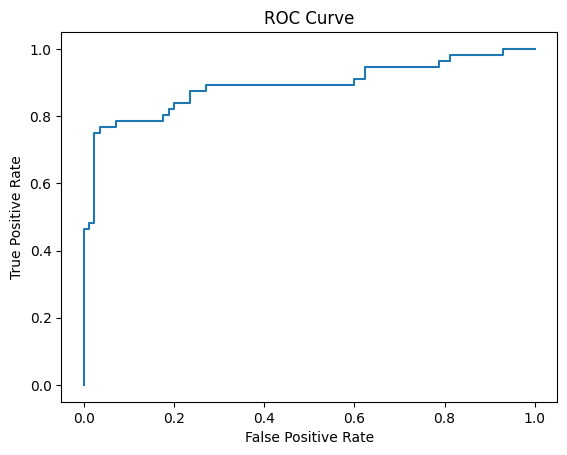

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print(f"Accuracy: {dl_accuracy:.5f}")

print("\nClassification Report:")
print(class_report)

ConfusionMatrixDisplay(confusion_matrix=cnf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

# Display ROC Curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

## Performance Comparison

In [77]:
print(model_accuracies)

{'Logistic Regress': 0.8368794326241135, 'Decision Tree': 0.7659574468085106, 'Random Forest': 0.8368794326241135, 'SVM': 0.8794326241134752, 'Gradient Boosting': 0.8581560283687943, 'Deep Learning': 0.8794326241134752}


Text(0, 0.5, 'Accuracy')

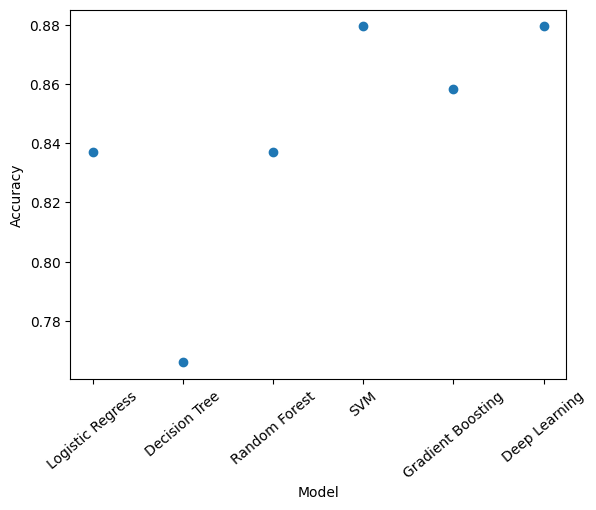

In [76]:
plt.scatter(model_accuracies.keys(), model_accuracies.values())
plt.xlabel("Model")
plt.xticks(rotation=40)
plt.ylabel("Accuracy")

## Summary

Top models are:
SVM and Deep Learning

SVM seems to be the best since its overal precision, recall, and f1 score look more balanced.
DL model was created with very poor parameters so it definitely has more room for improvements and could potentially reach high 90s accuracies.
If high accuracy is desired. Then a more tuned DL model can be created but SVM is very simple to set up and perform an analysis that is equally as good as the DL model. It could also be improved with some tuning. Therefore the SVM is probably the best suited for this task. While DL could potentially reach higher accuracies, the small percentage difference to svm doesn't seem worth the extra effort that it requires.

## Test Set Prediction

Take test set, clean it, load svm model, predict surviors for test set data